<h1> Importing stuff

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import matplotlib
import numpy as np

Importing the csv file and reading into pandas DataFrame

In [2]:
filePath = "F:/windows_alphamelts_1-8/links/output/2018-06-15_22-02/"

DF = pd.read_csv(filePath + "Phase_main_tbl.csv")
DF.head()

,Unnamed: 0,Pressure,Temperature,Phase,Mass,S,H,V,Cp,Vis,...,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,Mg#
0,0,12000.0,1673.15,liquid_0,97.412395,275.876628,-1.115936e+06,34.457509,146.320267,1.508,...,1.17946,17.070600,1.09767,10.101500,0.153985,8.68671,9.64325,2.61716,0.513282,60.5
1,1,12000.0,1673.15,orthopyroxene_0,0.995403,2.580825,-1.222580e+04,0.309233,1.280809,NaN,...,54.23830,0.105978,4.13229,0.671565,9.215230,0.00000,29.94460,1.63565,0.056390,0.0
2,0,12000.0,1671.15,liquid_0,97.078610,274.747807,-1.112279e+06,34.335314,145.770098,1.518,...,1.18315,17.115000,1.09904,10.104400,0.154514,8.61386,9.67070,2.62596,0.515047,60.3
3,1,12000.0,1671.15,orthopyroxene_0,0.334776,0.867371,-4.110448e+03,0.103966,0.430562,NaN,...,54.20770,0.106364,4.15103,0.673922,9.270450,0.00000,29.87580,1.65779,0.056999,0.0
4,0,12000.0,1669.15,liquid_0,96.747484,273.627718,-1.108653e+06,34.214113,145.224544,1.528,...,1.18684,17.159300,1.10040,10.107200,0.155043,8.54133,9.69805,2.63475,0.516809,60.1


In [3]:
reqDF = DF[['Temperature', 'Phase', 'Mass', 'F']]

reqDF.head()

,Temperature,Phase,Mass,F
0,1673.15,liquid_0,97.412395,0.986483
1,1673.15,orthopyroxene_0,0.995403,0.986483
2,1671.15,liquid_0,97.078610,0.983108
3,1671.15,orthopyroxene_0,0.334776,0.983108
4,1669.15,liquid_0,96.747484,0.979760


In [4]:
yData = reqDF['Temperature'].drop_duplicates().values.tolist()

yData[:5]

[1673.15, 1671.15, 1669.15, 1667.15, 1665.15]

In [5]:
# For X Data, which is basically the melt fraction
xData = list(pd.unique(reqDF['F']))

Extracting various information which has to be plotted or is used while plotting. 


Variables and their meaning:
yData = All the temperature <br>
xdata = All the F data corresponding to respective temperature <br>
phases = List containing the tuple of co existing phases at corresponding deltaPhase temperature <br>
deltaPhase = List of temperatures where change in coexisting phases takes place <br>
polygons = list of vertices of the polygons which has to be drawn, for any particular coexisting phase.


In [6]:
# list for listing the phases
phases = []

# list for storing the temperatures where the phases change
deltaPhase = []

for temperature in yData:
    
    currentT = reqDF[reqDF['Temperature'] == temperature]
    
    currentPhases = tuple(currentT['Phase'].values)
    
    if len(phases) == 0:
        phases.append(currentPhases)
        
    if phases[-1] != currentPhases:
        deltaPhase.append(temperature)
        phases.append(currentPhases)

polygons = []
currentPolygon = [
    (0, yData[0]), 
    (xData[0], yData[0])
]

for temperature, F in zip(yData, xData):
    if temperature in deltaPhase:
        currentPolygon.extend([
            (F, temperature),
            (0, temperature)
        ])
        
        polygons.append(currentPolygon)
        currentPolygon = [
            (0, temperature),
            (F, temperature)
        ]

# Beautifying the Phases:

def mapPhases(phases):
    shorthands = {
        'liquid': 'Lq',
        'feldspar': 'Fspar',
        'kfeldspar': 'KFs',
        'quartz': 'Qtz',
        'orthopyroxene': 'Opx',
        'clinopyroxene': 'Cpx',
        'garnet': 'Grt',
        'spinel': 'Spi',
        'aenigmatite': 'Angmt'
    }

    beautifulPhases = []
    for env in phases:
        envPhases = []
        for phase in env:
            envPhases.append(shorthands.get(phase.split('_')[0], phase))
        
        beautifulPhases.append(tuple(envPhases))

    return tuple(beautifulPhases)


phases = mapPhases(phases)

Plotting the figure.

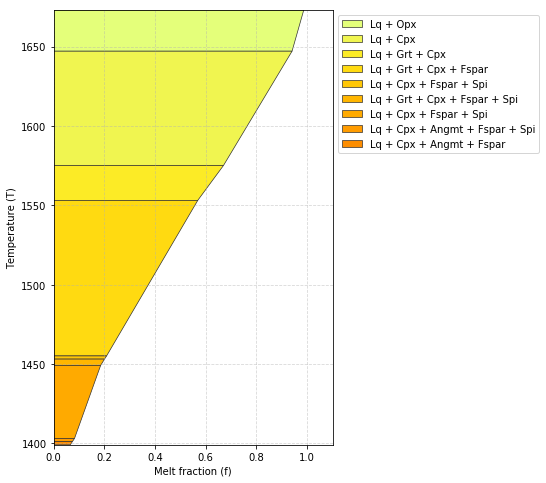

In [22]:
fig, ax = plt.subplots(figsize=(5,8))


plt.axis([0, 1.1, min(yData), max(yData)])
plt.xlabel('Melt fraction (f)')
plt.ylabel('Temperature (T)')
plt.grid(alpha=0.5, linestyle='--')

# Colors
cmap = matplotlib.cm.get_cmap('Wistia')
colors = np.linspace(0, 1, len(phases))
colors = [cmap(color) for color in colors]

for polygon, phase, color in zip(polygons, phases, colors):
    pltPoly = Polygon(
        polygon,
        facecolor=color,
        edgecolor='0.2',
        linewidth=0.7,
        label=' + '.join(phase))
    ax.add_patch(pltPoly)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))